<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/01-Mi-segundo-modelo-Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi segundo modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido Arellys Soria &bull; Fecha 29 - 11 - 2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este cuaderno está diseñado practicar en el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos reales. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Del conjunto de datos disponible [aquí](https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv), se desea predecir la variable `price` en función de las variables `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler, Normalizer, QuantileTransformer, PowerTransformer)
from sklearn.metrics import mean_squared_error

---
## <font color='264CC7'> Lectura de Datos </font>


Realiza la lectura de los datos y presenta las primeras filas del conjunto de datos.

In [ ]:
url = "https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv"
df = pd.read_csv(url)
# Traigo las cabeceras y la info para ver que se importo bien
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

---
## <font color='264CC7'> Preprocesamiento de datos </font>

Realiza un escalado de los datos, prueba diferentes técnicas y selecciona la que mejor se ajuste a los datos.

In [ ]:
# tomar variables
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
target = 'price'


df_model = df[features + [target]].copy()
df_model = df_model.dropna(subset=features + [target])


df_model['floors'] = df_model['floors'].astype(float)
df_model['price_log'] = np.log(df_model['price'])

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


---
## <font color='264CC7'> Características y etiquetas </font>

Separa las características y las etiquetas y mostrar la dimensión de cada elemento.

In [ ]:
X = df_model[features].values
y = df_model[target].values
y_log = df_model['price_log'].values 

X.shape, y.shape, y_log.shape

((21613, 5), (21613,))

---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [ ]:
cedula = 4

X_train, X_test, y_train, y_test, y_train_log, y_test_log = train_test_split(
    X, y, y_log,
    test_size=0.2,
    random_state=cedula
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 5), (4323, 5), (17290,), (4323,))

Revisa la distribución de las etiquetas en los conjuntos de entrenamiento y prueba.

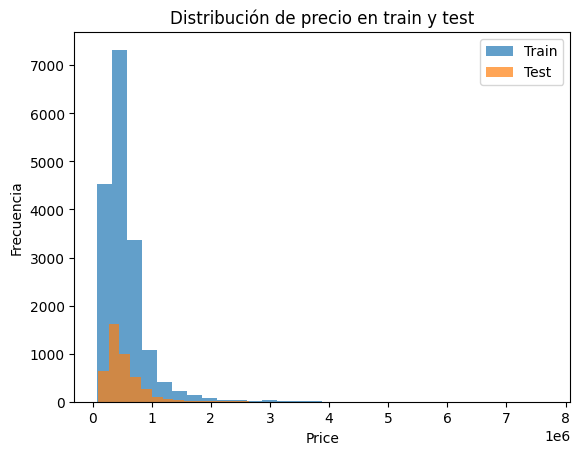

In [ ]:

plt.hist(y_train, bins=30, alpha=0.7, label='Train')
plt.hist(y_test, bins=30, alpha=0.7, label='Test')
plt.legend()
plt.xlabel("Price")
plt.ylabel("Frecuencia")
plt.title("Distribución de precio en train y test")
plt.show()

---
## <font color='264CC7'> Entrenamiento </font>

Define un modelo de regresión lineal y entrenalo con los datos de entrenamiento.

In [ ]:
scalers = {
    "MaxAbsScaler": MaxAbsScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "StandardScaler": StandardScaler(),
    "Normalizer": Normalizer(),
    "QuantileTransformer": QuantileTransformer(output_distribution='normal', random_state=0),
    "PowerTransformer": PowerTransformer(method='yeo-johnson')
}

resultados_mse = {}

for name, scaler in scalers.items():
    X_train_scaled_tmp = scaler.fit_transform(X_train)
    X_test_scaled_tmp = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled_tmp, y_train_log)

    y_pred_log_tmp = model.predict(X_test_scaled_tmp)
    
    y_pred_tmp = np.exp(y_pred_log_tmp)
    
    mse_tmp = mean_squared_error(y_test, y_pred_tmp)

    resultados_mse[name] = mse_tmp

best_scaler_name = min(resultados_mse, key=resultados_mse.get)
print("Mejor escalador:", best_scaler_name)
print("MSE con el mejor escalador:", resultados_mse[best_scaler_name])

best_scaler = scalers[best_scaler_name]

X_train_scaled = best_scaler.fit_transform(X_train)
X_test_scaled = best_scaler.transform(X_test)

final_model = LinearRegression()
final_model.fit(X_train_scaled, y_train_log)

Mejor escalador: MinMaxScaler
MSE con el mejor escalador: 59742013410.60304


LinearRegression()

---
## <font color='264CC7'> Evaluación </font>

Realiza la predicciones con el conjunto de prueba y muestra los valores en una tabla.

In [ ]:
y_pred_log = final_model.predict(X_test_scaled)
y_pred = np.exp(y_pred_log)

resultados = pd.DataFrame({
    "y_real": y_test,
    "y_pred": y_pred
})

resultados.head()

,y_real,y_pred
0,297000.0,4.179096e+05
1,1578000.0,1.321662e+06
2,562100.0,4.156510e+05
3,631500.0,3.186865e+05
4,780000.0,8.596693e+05


Calcula el error cuadrático medio.

In [ ]:
mse_final = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE) del modelo final a:", mse_final)

rmse_final = np.sqrt(mse_final)
print("Raíz del MSE (RMSE):", rmse_final)

Error cuadrático medio (MSE) del modelo final: 59742013410.60304
Raíz del MSE (RMSE): 244421.79405814662


Escribe el error cuadrático medio para cada tipo de escalado:

- Escalador MaxAbsScaler        6.484818e+10
- Escalador MinMaxScaler        6.484818e+10
- Escalador RobustScaler        6.484818e+10
- Escalador StandardScaler      6.484818e+10
- Escalador QuantileTransformer 7.838937e+10
- Escalador PowerTransformer    7.863031e+10
- Escalador Normalizer          1.013373e+11

Escribe un párrafo sobre qué hace cada escalado no visto en clase:

- **Escalado ...:** 